# ORIE 4580/5580/5581 Assignment 5

#### Students: Danielle Xu (dzx4) and Vicki Yang (vzy3)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Friday, October 13, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 8 (all parts) and 9 (up to Section 9.2 for the midterm) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [15]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import pandas as pd
import math




---
---


# Question 1: Red-Tailed Hawks! (15 points)

(Dedicated to [Big Red and Arthur](https://www.youtube.com/watch?v=diIn5tc8AJo), and their amazing family!)

A School of Ornithology researcher wants to estimate the number of red-tailed hawks in Ithaca. She radio tags 10 birds, and then sets up a feeding station with automatic camera.

The researcher believes that each individual bird's visits to the feeder can be modeled as a *Poisson process* with some unknown rate $\lambda$; we will talk more about the Poisson process in detail later in the semester (for a quick refresher, see Section 2.9.4 of Ross), but for this question, the main thing you need to know is that this is a process that counts a discrete number of arrivals, where the *inter-arrival* between one arrival and the next is independent and identically distributed as an Exponential$(\lambda)$ random variable (similar to the trains in question 5b in the previous assignment).

**(a)**
Over the first five weeks, the researcher observes an average of 28.8 birds (tagged and untagged) visiting the feeder, with an average of 6 tagged birds per week. Use the method of moments to obtain an estimate for the total population.

___
## Ans.

Using method of moments:

$\frac{6}{28.8} ≈ \frac{10}{P}$ where P is an estimate of the total population

Therefore, $P ≈ \frac{10*28.8}{6}$

$P \approx 48$

___

**(b)** Next, the researcher develops a video processing program which can identify and distinguish different individual birds from their pictures. Using this, over the next week, she observes 20 unique birds visiting the feeding station, out of which 4 are tagged. What is the MLE for the size of the hawk population in Ithaca?

___

## Ans.



___
___

# Question 2: Soup for Lunch? (15 points)

The folks at the [Temple of Zeus](https://as.cornell.edu/about/temple-of-zeus) have the best soup offerings at Cornell -- however, by the time you are done with Simulation, they often run out of soup. To remedy this, you want to try and understand the demand for soup, so that you can suggest how much they should make. You decide to model the total demand $N$ for soups each day as a geometric random variable with parameter $p$ (i.e., $P(N = k) = (1-p)^kp$, $k \ge 0$).

The Temple of Zeus manager gives you data for the number of lunches sold in the last $100$ days. One problem though is that the data is *censored*: the staff prepared soup for at most $40$ servings each day, and as a result, the number of sales each day is between 0 and 40. As a result, on days when the number of soups sold is $40$, you cannot be sure what the true demand $N_i$ was (but you know $N_i\geq 40$); on other days, the number of soups sold is the true demand $N_i<40$.

___

**(a)**
What is the probability mass function of the per-day sales $Y$ in terms of $p$?
___


## Ans.

$Y = P(N=k)$ where Y is the probability mass function of the per-day sales and N is the total demand for soups each day

$Y = \begin{cases} (1-p)^kp & \text{ if $k < 40$} \\ (1-p)^{40} & \text{ if $k = 40$} \end{cases}$

$P(N=40) = 1 - Σ_{k=1}^{39}{P(n=k)} = 1 - Σ_{k=1}^{39}{(1-p)^kp}$

$P(N=40) = 1 - p [1 + (1-p) + (1-p)^2 + ... + (1-p)^{39}]$

$P(N=40) = 1 - p [\frac{1-(1-p)^{40}}{1-(1-p)}]$

$P(N=40) = (1-p)^{40}$


___

**(b)** Compute a maximum likelihood estimator of $p$ based on the sales data for soup given in `Soup_sales_data.csv`.
___

## Ans.

Likelihood

$L = Π_{i=1}^nY = Π_{i=1}^n(1-p)^{y_i, y_i < 40}p*Π_{i=1}^n(1-p)^{40, y_i=40}$

Using r as the number of points in the dataset where demand N is $ < 40 $

$L = p^r*Π_{i=1}^n(1-p)^{y_i}$

Log likelihood

$Log(L) = rlogp + log(1-p)Σ_{i=1}^ny_i$

Solving for $p$

Take derivative with respect to $p$ and set equal to 0 to find the maximum $p$

$0 = \frac{r}{p} - \frac{Σ_{i=1}^ny_i}{1-p}$

$p = \frac{r}{r + Σ_{i=1}^ny_i}$

In [117]:
df = pd.read_csv('Soup_sales_data.csv')
df

Y = df['Y']

sum_yi = 0
for yi in Y:
  sum_yi += yi
p = (len(Y[Y<40]))/(len(Y[Y<40])+sum_yi)

print("mle of p = " + str(p))

mle of p = 0.02679658952496955


___
___

# Question 3: The Birthday Paradox (40 pts)

In this question, we investigate the celebrated [birthday paradox](https://en.wikipedia.org/wiki/Birthday_problem)!

___

**(a)** The basic question you may have seen in earlier probability courses is the following: given a party of $n$ people whose birthdays are drawn uniformly over the $365$ days in the year, what is the probability that at least two people share a birthday. Derive an expression for the probability, and plot it for $n\in\{10,11,12,\ldots,49,50\}$.
___

## Ans.

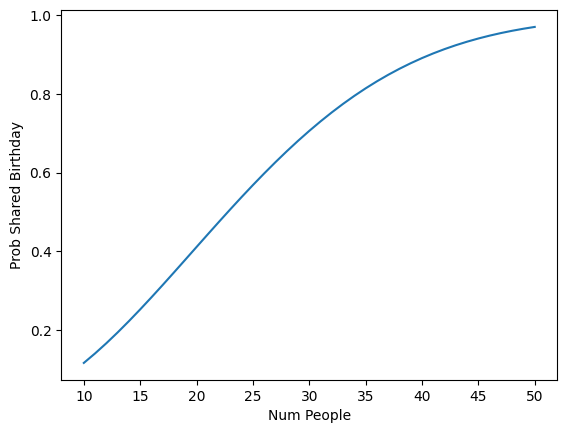

In [88]:
# for i in n:
#     U = np.random.uniform(0,1,365)
# #     random_day = np.random.randint(365)
# #     print(random_day)
# # print(U)

n = np.arange(10, 51)
prob = []

# I did google birthday paradox to help me with the formula.
# Also went to all of the office hours on Wednesday 10/11/23
for i in n:
    p_no_shared_bday = 1
    # print(i)
    for j in range(i):
        # print(j)
        p_no_shared_bday = p_no_shared_bday * ((365 - j) / 365)
    p_shared_bday = 1 - p_no_shared_bday
    prob.append(p_shared_bday)

# print(prob)

plt.plot(n, prob)
plt.xlabel("Num People")
plt.ylabel("Prob Shared Birthday")
plt.show()

___
**(b)** Next, we want to obtain the above probabilities by simulation. For a given $n$, perform simulations so as to estimate the probability  of at least two people sharing birthdays in a group of $n$, for $n\in\{15,16,\ldots,30\}$, up to $2$ decimal places (with $95\%$ confidence). Plot the estimates and $95\%$ CI, and also plot the theoretical result from part $(a)$ in the same plot.
___

## Ans.

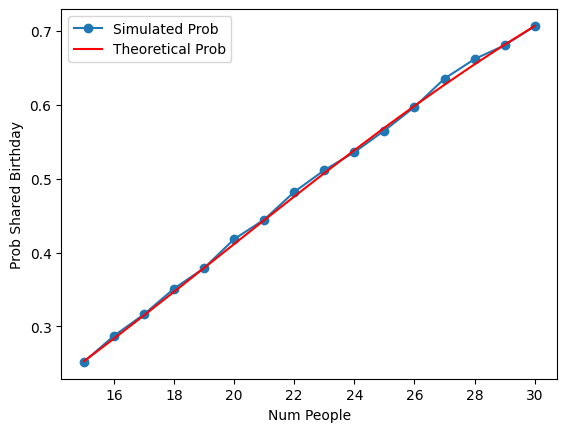

In [89]:
# ChatGPT was used to help debug this code

def has_shared_bday(bdays):
    seen = []
    for bday in bdays:
        if bday in seen:
            return True
        seen.append(bday)
    return False

sims = 10000
n = np.arange(15, 31)

theoretical_prob = [] # part a
simulated_prob = []
CI = []

for i in n:
    shared_bdays = 0

    for j in range(sims): # random bdays
        bdays = np.random.choice(365, size=i)
        # print(bdays)

        # shared bdays
        if has_shared_bday(bdays):
            shared_bdays += 1
            # print(shared_bdays)

    prob = shared_bdays / sims
    simulated_prob.append(prob)
    # print(simulated_prob)

    # CI
    z = stats.norm.ppf(0.95)
    lb = prob - (z * (np.sqrt((prob * (1 - prob)) / sims)))
    ub = prob + (z * (np.sqrt((prob * (1 - prob)) / sims)))
    CI.append((lb, ub))
    # print(CI)

    # part a code
    p_no_shared_bday = 1
    for j in range(i):
        p_no_shared_bday = p_no_shared_bday * ((365 - j) / 365)
    theoretical_probab = 1 - p_no_shared_bday
    theoretical_prob.append(theoretical_probab)

# print(CI)
plt.plot(n, simulated_prob, label="Simulated Prob", marker='o')
plt.plot(n, theoretical_prob, label="Theoretical Prob", color='r')

plt.xlabel("Num People")
plt.ylabel("Prob Shared Birthday")
plt.legend()
plt.show()



---

**(c)** One flaw in our analysis is that birth-dates may not be uniformly distributed throughout the year. To check this, we can look at data of real birth-dates.

The file `bdaydata.txt` has a list of $365$ days in the year (excluding February $29$) and the corresponding number of birthdays on that date. Load the dataset and plot the following:

i. Empirical histogram of the data

ii. Empirical cdf

iii. Q-Q plot comparing the data to a uniform distribution

(Dataset based on life insurance data from 1981-94; data and example courtesy [Roy Murphy](http://www.panix.com/~murphy/bday.html).)
___

## Ans.

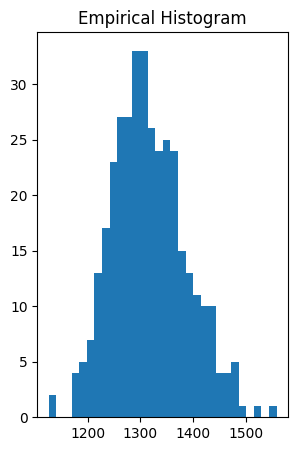

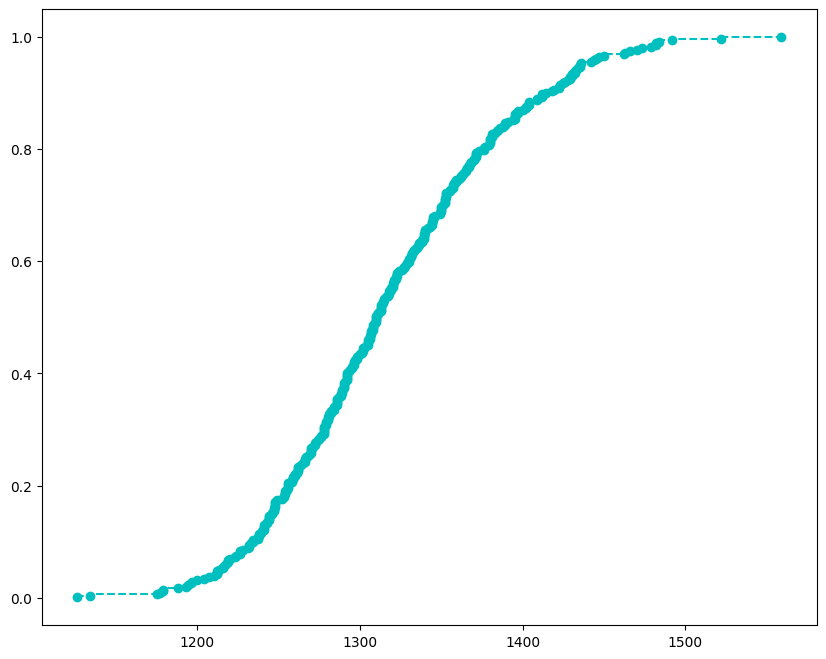

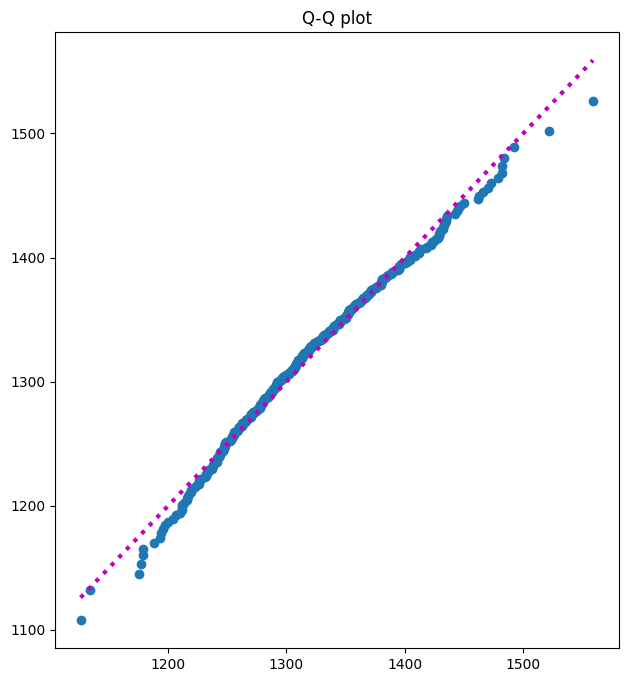

In [90]:
# For loading the data, you can use "df = pd.read_csv('bdaydata.txt',sep=' ')"
# Please note that the txt file needs to be placed in the same folder with the ipynb file.
# To extract the counts column as a vector, use "df.values[:,1]"

# For loading the data, you can use "df = pd.read_csv('bdaydata.txt',sep=' ')"
# Please note that the txt file needs to be placed in the same folder with the ipynb file.
# To extract the counts column as a vector, use "df.values[:,1]"

# ChatGPT was used to help debug this code
df = pd.read_csv('bdaydata.txt', sep=' ', names=['Date', 'Count'], skiprows=1)
df['Count'] = df['Count'].astype(int)
counts = df['Count'].values

# Empirical Histogram
plt.figure(figsize=(11, 5))
plt.subplot(131)
plt.hist(counts, bins=30)
plt.title('Empirical Histogram')

from scipy.stats import expon, foldnorm, norm

N = 2000
p_mix = 0.5
normal_center = 3

def emp_cdf(x, cont_corr=True):
    """
    Calculate the empirical cumulative distribution function (CDF) of a dataset.

    Parameters:
    x (array-like): The dataset for which to calculate the empirical CDF.
    cont_corr (bool, optional): Whether to apply continuity correction. Default is True.

    Returns:
    tuple: A tuple containing two arrays: the sorted dataset and the empirical CDF.
    """
    n = len(x)
    x_sort = np.sort(x)

    if cont_corr:
        # Apply continuity correction
        cdf = (np.arange(1, n + 1) - 0.5) / n
    else:
        # No continuity correction
        cdf = (1.0 * np.arange(1, n + 1)) / n

    return x_sort, cdf

# Emperical CDF, code used from demo7
X = df.values[:,1]

# Create a figure for plotting
plt.figure(figsize=[10, 8])

# Calculate the empirical CDF of the dataset
x, ecdf = emp_cdf(X)

# Plot the empirical CDF as a step function
plt.plot(x, ecdf, 'co', label='Empirical cdf', linestyle='--', drawstyle='steps')

emp_mean = np.mean(X)
emp_stddev = np.std(X)

#QQ PLot, code taken from demo7

# Create a figure with two subplots
fig = plt.figure(figsize=(16, 8))

# Subplot 1: Q-Q plot for the normal distribution fit
ax = fig.add_subplot(1, 2, 1)

# Calculate the quantiles of the empirical CDF based on the normal distribution fit
cdf_1 = norm.ppf(ecdf, loc=emp_mean, scale=emp_stddev)

# Plot the quantiles against the theoretical quantiles (a straight line)
plt.plot(x, cdf_1, 'o')  # Points in the Q-Q plot
plt.plot(x, x, ':m', linewidth=3)  # Theoretical quantiles as a magenta dotted line

plt.title("Q-Q plot")


plt.show()


___

**(d)** Perform a Chi-square Test **and** a Kolmogorov-Smirnov Test to study how well the data is modeled by a uniform distribution.

___

## Ans.


In [91]:
# Calculate the sample size
n = np.size(X)
eps = 1e-6
lam_est = 1.0 / np.mean(X)

# Set the minimum expected frequency (E_min) and compute the number of bins (k)
E_min = 6.0
k = int(n/E_min)

# Set the value of s and compute the degrees of freedom (df) for the chi-squared test
s = 1
df = k - s - 1

# Define the bins based on the exponential distribution with the estimated lambda (lam_est)
bins = expon.ppf(np.append(1.0*np.arange(k)/k, 1 - eps), scale=1.0/lam_est)

# Compute the observed histogram and expected frequencies
obs, bins = np.histogram(X, bins=bins)
exp = float(n/k) * np.ones(k)


from scipy.stats import chisquare
chi_sq_result = chisquare(obs,exp,ddof=s)
print(chi_sq_result)

Power_divergenceResult(statistic=4840.863013698629, pvalue=0.0)


If the p-value in a chi-squared test is 0 when modeling data with a uniform distribution, it means that the data doesn't have the uniform characteristics we expected.

The KS statistic is D = 0.58475111



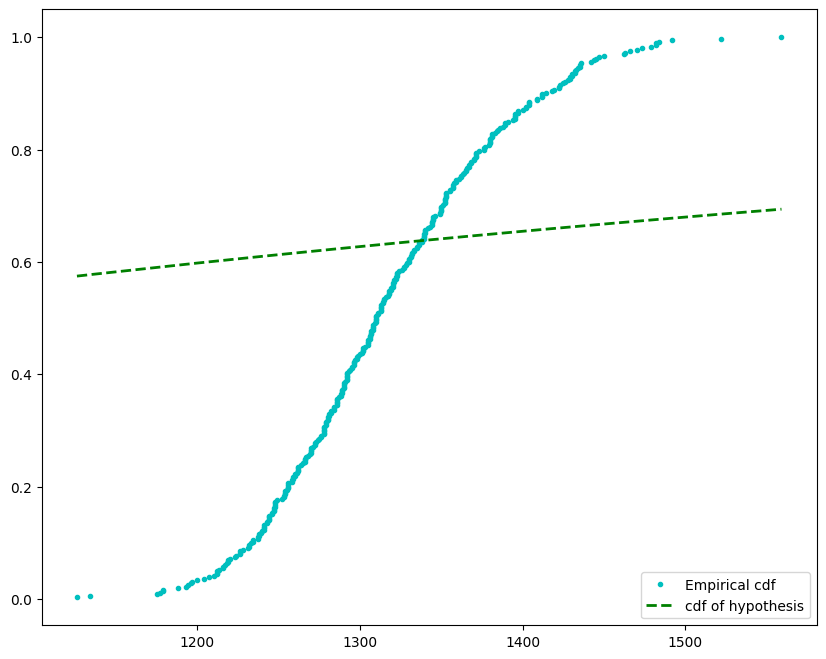

In [92]:
# Compute the empirical CDF of the dataset
X_sort, X_ecdf = emp_cdf(X, cont_corr=False)

# Create a new figure for plotting
plt.figure(figsize=[10, 8])

# Plot the empirical CDF as a step function with cyan dots
plt.step(X_sort, X_ecdf, 'c.', linewidth=1, where='post', label='Empirical cdf')

# Calculate the CDF of the exponential distribution with the estimated parameter
Hyp_cdf = expon.cdf(X_sort, scale=1.0/lam_est)

# Plot the CDF of the hypothesis as a green dashed line
plt.plot(X_sort, Hyp_cdf, 'g--', linewidth=2, label='cdf of hypothesis')

# Calculate the Kolmogorov-Smirnov (KS) statistic
D_KS = np.max(np.concatenate((np.abs(Hyp_cdf[1:] - X_ecdf[:-1]), np.abs(Hyp_cdf - X_ecdf)), axis=0))

# Print the KS statistic
print("The KS statistic is D = " + str(round(D_KS, 8))+'\n')

# Add a legend to the plot
plt.legend(loc=4)

# Show the plot
plt.show()

In [93]:
from scipy.stats import kstest
kstest(X,"expon",args=(0,1.0/lam_est))

KstestResult(statistic=0.5847511148290243, pvalue=3.5438471016111656e-119, statistic_location=1175, statistic_sign=-1)

___

**(e)** Since you have an extensive dataset of birthday frequency, you can directly use the nonparametric bootstrap to estimate the probability of at least two people sharing birthdays in a group of $n$. Plot the bootstrap estimate and $95\%$ CI for $n\in\{15,16,\ldots,30\}$, and compare against the plot in part $(b)$.

___

## Ans.


5.0% Confidence Interval: (1302.04, 1302.04)
Sample mean and standard deviation are 1317.03 and 69.864

Bootstrap mean and standard deviation are 1302.04 and 70.946



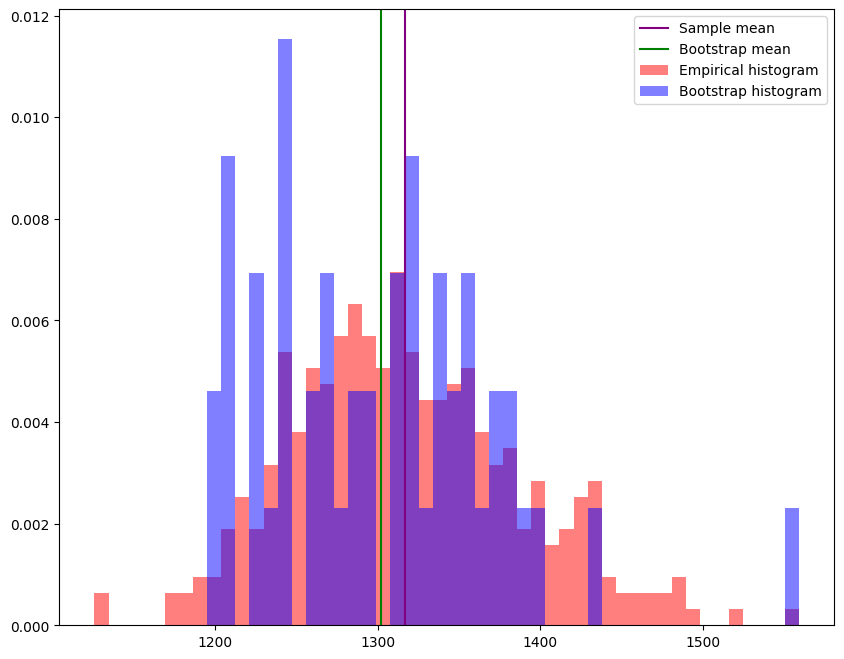

In [95]:
# Parameters
n = len(X)  # Size of the dataset
b = 50      # Number of bootstrap samples

# Generate bootstrap samples by randomly sampling from the original dataset X
X_b = np.random.choice(X, b)

# Create a figure for plotting
plt.figure(figsize=[10, 8])

# Calculate the mean and std-dev of the original dataset and the bootstrap samples
mean = np.mean(X)
sample_std = np.std(X)
bst_mean = np.mean(X_b)
bst_std = np.std(X_b,ddof=1)

# Plot vertical lines for the sample mean and bootstrap mean
plt.axvline(mean, color='purple', label='Sample mean')
plt.axvline(bst_mean, color='green', label='Bootstrap mean')

alpha = 0.05

lower_bound = np.percentile(bst_mean, (1 - alpha) / 2 * 100)
upper_bound = np.percentile(bst_mean, (1 + alpha) / 2 * 100)
print(f"{alpha * 100}% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")

# Create histograms for the original dataset and bootstrap samples
n_tmp, bins, patches = plt.hist(X, bins=50, alpha=0.5, density=True, label='Empirical histogram', color='red')
plt.hist(X_b, bins, alpha=0.5, density=True, label='Bootstrap histogram', color='blue')

# Compute and print the bootstrap mean and standard deviation
print("Sample mean and standard deviation are "+str(round(mean,2))+" and "+str(round(sample_std,3))+'\n')
print("Bootstrap mean and standard deviation are "+str(round(bst_mean,2))+" and "+str(round(bst_std,3))+'\n')


# Add a legend to the plot
plt.legend(loc=1)

# Show the plot
plt.show()

___
___

# Question 4: Benford's Law (30 pts)

In this question, we will use the Chi-square test to study *Benford's law* in a variety of setttings. Consider a data set consisting of $n$ different numbers, and look at the leading digit of each number (for example, the leading digit of $123.456$ is $1$, and the leading digit of $-0.423$ is $4$). For many data sets, the fraction of leading digits that equal $1$ is much higher than $1/9$ (i.e., what it would be if uniformlly distributed); in fact, the probability distribution of the different leading digits $1, 2, \ldots, 9$ is far from uniform.

This observation has been observed to hold in measurements of distances to galaxies, numbers appearing in tax forms and many other settings, and has been used to detect fraud among other uses. See [the Wikipedia page](https://en.wikipedia.org/wiki/Benford\%27s_law) for a description of this phenomena, and [this blog post](https://terrytao.wordpress.com/2009/07/03/benfords-law-zipfs-law-and-the-pareto-distribution/) for an interesting related discussion. More recently, this has also been (supposedly) misused in (supposedly) detecting (supposed) fraud in election results -- see [this Stand-Up Maths](https://www.youtube.com/watch?v=etx0k1nLn78&t=4s) video for a great example of how data analysis should be done!



___

**(a)** First, we will study this phenomena in a *synthetic* dataset. For this, compute the first digits of $n!$ for the first $1500$ integers, and plot their empirical histogram. You can use the code fragment provided to generate the first $n$ factorials.
___


## Ans.

([<matplotlib.axis.XTick at 0x782a66390370>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

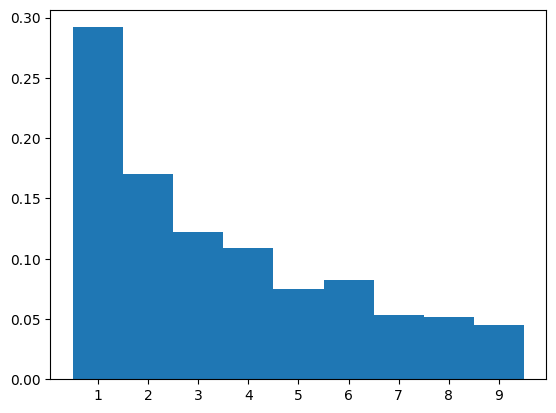

In [113]:
#from scipy.misc import factorial
#fact_series = factorial(np.arange(n),exact=True)
#first_digit = np.zeros(n)
#for i in range(n):
# first_digit[i] = int(str(fact_series[i])[0])

from scipy.special import factorial

n=1500

fact_series = factorial(np.arange(n),exact=True)
first_digit = np.zeros(n)
for i in range(n):
  first_digit[i] = int(str(fact_series[i])[0])

plt.hist(first_digit, bins=np.arange(1, 11)-0.5, density=True)
plt.xticks(range(1, 10))

___
**(b)** Use a Chi-square test to determine how well the data can be modeled using a uniform distribution.

___


## Ans.

In [114]:
expected = np.ones(9)*(n/9)
observed, bins = np.histogram(first_digit, bins=np.arange(1,11))

chisq_stat, chisq_p = stats.chisquare(observed, expected)

print("chi-square test statistic = " + str(chisq_stat))
print("chi-square p-value = " + str(chisq_p))
# print(np.sum(first_digit))
# print(np.sum(expected))

chi-square test statistic = 670.8000000000002
chi-square p-value = 1.3805718582880795e-139


It seems that the data cannot be modeled well using a uniform distribution. Since the p value is so small, it shows that it's unlikely that the data fits a uniform distribution.

___

**(c)** Next, use a Chi-square test to test how well the data is modeled using the 'Benford's Law' distribution:
$$p(d)= \log _{10}(d+1)-\log _{10}(d), \quad d\in\{1,2,\ldots,9\}$$


___

In [115]:
p_benford = []
d = [1,2,3,4,5,6,7,8,9]
for di in d:
  p_benford.append(np.log10(di+1)-np.log10(di))
expected = np.ones(9)*np.array(p_benford)
expected = expected*n

chisq_stat, chisq_p = stats.chisquare(observed, expected)

print("chi-square test statistic = " + str(chisq_stat))
print("chi-square p-value = " + str(chisq_p))

chi-square test statistic = 9.456569118464648
chi-square p-value = 0.3052548339606756


The data can be modeled better using the Benford's law distribution than using a uniform distribution

___

**(d)** Finally, we will repeat this analysis with a more natural dataset. The dataset `us_pop.csv` contains the US population in 100,000 different zip codes in the year 2010, and the numbers range from less than ten to almost 100,000. As above, compute the histogram of the leading digits, and use the Chi-square test to see how well the data is modeled via the uniform and the Benford's law distributions.
___

## Ans.

chi-square test statistic using uniform = 50323.53572
chi-square p-value using uniform = 0.0
chi-square test statistic using benford law = 11.84322681811079
chi-square p-value using benford law = 0.15833698137850147


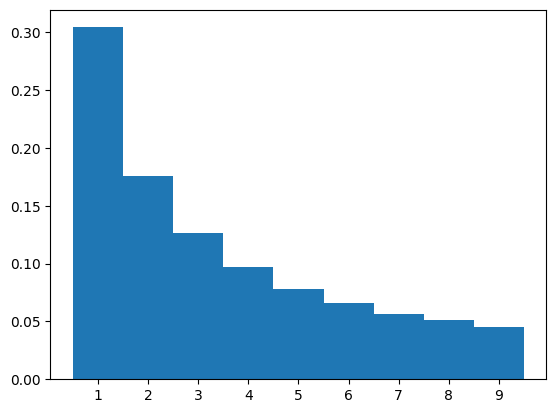

In [116]:
df2 = pd.read_csv('us_pop.csv')
df2

first_digit2 = np.zeros(len(df2))
for i in range(len(df2)):
  first_digit2[i] = int(str(df2['population'][i])[0])

plt.hist(first_digit2, bins=np.arange(1, 11)-0.5, density=True)
plt.xticks(range(1, 10))

expected_u = np.ones(9)*(len(df2)/9)
observed, bins = np.histogram(first_digit2, bins=np.arange(1,11))

chisq_stat, chisq_p = stats.chisquare(observed, expected_u)

print("chi-square test statistic using uniform = " + str(chisq_stat))
print("chi-square p-value using uniform = " + str(chisq_p))

p_benford = []
d = [1,2,3,4,5,6,7,8,9]
for di in d:
  p_benford.append(np.log10(di+1)-np.log10(di))
expected_b = np.ones(9)*np.array(p_benford)
expected_b = expected_b*len(df2)

chisq_stat, chisq_p = stats.chisquare(observed, expected_b)

print("chi-square test statistic using benford law = " + str(chisq_stat))
print("chi-square p-value using benford law = " + str(chisq_p))

**(e) (Optional for all students)** To understand how the Benford's law distribution originates, the important idea is that when a random variable $X$ ranges over several orders (say between $0$ and $10^6$), then it is better modelled by saying that $\log_{10}(X)$ is uniformly distributed on interval $[0,6]$ (rather than $X$ being uniform on $[0,10^6]$. Using this, can you derive the the exact probabilities for each of the leading digits.